(chapters:model_exploration)=
# Model Exploration

This section is **not** called model selection because our final goal is not to find the model with the best average of the true error estimation. We instead aim to showcase the common Data Science pipeline and try multiple models, showing at the same time the programming side and the mathematical side of them.

## 1. Support Vector Machines

This algorithm tries to find a hyperplane that divides the saples living in the feature space, maximizing the minimum distance between the hyperplane itself and the closest point in both resulting halfspaces. 

### 1.1 Theory

#### 1.1.1 Margin and Hard-SVM

Let $S = \left(\mathbf{x}_1, \mathcal{y}_1\right)\dots\left(\mathbf{x}_m, \mathcal{y}_m\right)$ be the training set of size m, where each $\mathbf{x}_i\in\mathbb{R}^d$ and $\mathcal{y}_i\in\{\pm1\}$. We say that the training set is linearelt separable, if there exists a halfspace, $\left(\mathbf{w}, \mathcal{b}\right)$ such that $y_{i}=\operatorname{sign}\left(\left\langle\mathbf{w}, \mathbf{x}_{i}\right\rangle+b\right)$ for all $i$. We can write this condition as:

$$\forall i \in \left[m\right],\ y_i\left(\left\langle\mathbf{w, x_i}\right\rangle+b\right)>0$$

All halfspaces $\left(\mathbf{w}, \mathcal{b}\right)$ that satisfiy the condition above are $\operatorname{ERM}$ hypotheses (and their 0-1 error is zero). For any **separable** training set, there are many $\operatorname{ERM}$ halfspaces, which one should we pick?

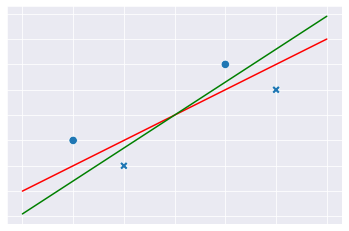

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

xp = [-2, -1, 1, 2]
yp = [-1, -2, 2, 1]
c = [0, 1, 0, 1]

m1, q1 = 1, 0
m2, q2 = 1.3, 0
x = np.linspace(-3, 3, 100)
y1 = x*m1 + q1
y2 = x*m2 + q2
ax = sns.lineplot(x=x, y=y1, palette="tab10", color='red')
sns.lineplot(x=x, y=y2, palette="tab10", color='green')
sns.scatterplot(x=xp, y=yp, style=c, ax=ax, legend=False, s=70)
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()

Intuitively we might choose the red hyperplane to split our data, in order to formalize this intuition we introduce the concept of margin.

```{admonition} Margin
:class: important
The margin of a hyperplane with respect to a training set is the minimal distance between a point in the training set and the hyperplane
```

Note that if a hyperplane has a large margin, even if we sligthly perturn each dataset instance, it will still separate the data *correctly*.

As we will see later, the larger is the margin that a halfspace has over the training sample, the smaller is the true error of the halfspace. For this reason the *Hard-SVM* rule is the rule that returns an $ERM$ hyperplane that separates the training set with the largest possible margin.

* Claim: The distance between a point $\mathbf{x}$ and the hyperplane defined by $\left(\mathbf{w},b\right)$ where $\left\lVert\mathbb{w}\right\rVert=1$ is $\left\lvert\left\langle\mathbf{w, x}\right\rangle+b\right\rvert$

On this basis, the point $\mathbf{x_i}\in S$ closest to the hyperplane $L$ is

$$d\left(\mathbf{x},L\right)=\underset{i\in\left[m\right]}{\operatorname{min}}\left\lvert\left\langle\mathbf{w, x_i}\right\rangle+b\right\rvert$$

Hence, the Hard-SVM rule is 

```{admonition} Hard-SVM rule
:class: important
$$\underset{\left(\mathbf{w}, b\right):\left\lVert\mathbf{w}=1\right\rVert}{\operatorname{argmax}}\underset{i\in\left[m\right]}{\operatorname{min}}\left\lvert\left\langle\mathbf{w, x_i}\right\rangle+b\right\rvert\ \ s.t.\ \ \forall i, \ \mathcal{y_i}\left(\left\langle\mathbf{w, x_i}\right\rangle+b\right)>0\tag{1}$$

Equivalently 

$$\underset{\left(\mathbf{w}, b\right):\left\lVert\mathbf{w}=1\right\rVert}{\operatorname{argmax}}\underset{i\in\left[m\right]}{\operatorname{min}}\mathcal{y_i}\left(\left\langle\mathbf{x, x_i}\right\rangle+b\right)\tag{2}$$

Equivalently

$$\underset{\left(\mathbf{w}, b\right)}{\operatorname{argmin}}\left\lVert\mathbf{w}\right\rVert^2\ \operatorname{s.t.}\ \forall i,\ \mathcal{y_i}\left(\left\langle\mathbf{w, x_i}\right\rangle+b\right)>1\tag{3}$$
```

Intuitively, we are going from maximizing the numerator of the distance formula (maximizing the minimal distance) to minimizing the norm of $w$.
The last equation can be solved via quadratic programming.

We now have to define a new concept of separability:

```{admonition} $\left(\gamma,\rho\right)$-margin
:class: important
We say that $\mathcal{D}$ is separable with a $\left(\gamma,\rho\right)$-margin if exists $\left(\mathbf{w^*}, b^*\right)\ \operatorname{s.t.}\ \left\lVert\mathbf{w^*}\right\rVert=1$ and

$$\mathcal{D}\left(\{\left(x, y\right): \left\lVert x\right\rVert\leq\rho \wedge \mathcal{y}\left(\left\langle\mathbf{w^*, x}\right\rangle+b^*\right)>1 \}\right)=1$$

This means that when we say that $\mathcal{D}$ is separable with a $\left(\gamma,\rho\right)$-margin, if there is a ball of radius $\rho$ inside which the hyperplane can **always** separate the points (finite set of points can violate the separability)
```

We can now state the theorem that gives us the sample complexity for Hard-SVM (without proving it)

```{admonition} Hard-SVM Sample complexity
:class: important
if $\mathcal{D}$ is separable with a $\left(\gamma,\rho\right)$-margin, then the sample complexity of Hard-SVM is

$$m\left(\epsilon,\delta\right)\leq \frac{8}{\epsilon^2}\left(2\left(\frac{\rho}{\gamma}\right)^2+\log{\frac{2}{\delta}}\right)$$

Note that the sample complexity obtained by computing the VC dimension of half spaces in $d$ dimensions, we get that the sample complexity is $d$. While now we have found that the sample complexity does not depend on the dimension, but only on the $\frac{\rho}{\gamma}$ ratio (and the accuracy $\delta$ and the correctness $\epsilon$)
```



#### 1.1.2 Soft-SVM

In the Hard-SVM settings we made the strong separability assumption, which needs to be relaxed in order to apply SVMs to real data. In order to relax this constraint, we introduce nonnegative slack variables $\xi_1,\dots,\xi_m$, and we repace each constraint that was before $\mathcal{y_i}\left(\left\langle\mathbf{w,x_i}\right\rangle+b\right) \geq 1$ with $\mathcal{y_i}\left(\left\langle\mathbf{w,x_i}\right\rangle+b\right) \geq 1 - \xi_i$. $\xi_i$ measures by how much the constraint $\mathcal{y_i}\left(\left\langle\mathbf{w,x_i}\right\rangle+b\right) \geq 1$ is being violated. The Soft-SVM rules then writes:

```{admonition} Soft-SVM rule
:class: important
$$\underset{\left(\mathbf{w}, b\right)}{\operatorname{argmin}}\left(\lambda\left\lVert\mathbf{w}\right\rVert^2+\frac{1}{m}\overset{m}{\underset{i=1}{\sum}}\xi_i\right) \operatorname{s.t.}\ \forall i,\ \mathcal{y_i}\left(\left\langle\mathbf{w, x_i}\right\rangle+b\right)\geq1\wedge\xi_i\geq0\tag{3}$$

Note that now we also minimize the average violation of the constraint along with the norm
```

#### 1.1.3 Kernel Trick

Note that there exists a dual formulation for the SVM problem:

```{admonition} Hard-SVM Primal-Dual
:class: important
(Primal)

$$\underset{\left(\mathbf{w}, b\right)}{\operatorname{argmin}}\left\lVert\mathbf{w}\right\rVert^2\ \operatorname{s.t.}\ \forall i,\ \mathcal{y_i}\left\langle\mathbf{w, x_i}\right\rangle\geq1\tag{3}$$


(Dual)

$$\underset{\mathbf{\alpha}\in\mathbb{R}^m:\mathbf{\alpha}\geq\mathbf{0}}{\operatorname{max}}\underset{\mathbf{w}}{\operatorname{min}}\left(\frac{1}{2}\left\lVert\mathbf{w}^2\right\rVert+\overset{m}{\underset{i=1}{\sum}}\alpha_i\left(1-y_i\langle\mathbf{w, x_i}\rangle\right)\right)$$
```

We start by fixing $\alpha$ and solving the inner optimization (we call it $Z$). Note that the inner minimization is the minimization of a hyperparaboloid in $w$, and in order to find the minimum, it is enough to find the vertex of the paraboloid, requiring the derivative equals 0

$$\nabla Z\left(w\right)=\mathbf{w}-\overset{m}{\underset{i=1}{\sum}}\alpha_i y_i \mathbf{x}_i$$

$$\mathbf{w}=\overset{m}{\underset{i=1}{\sum}}\alpha_i y_i \mathbf{x}_i$$

NOTE that this means that our solution is nothing more than a linear combination of our data. Plugging back the solution of the inner optimization, into the outer optimization, we obtain

$$\underset{\mathbf{\alpha}\in\mathbb{R}^m:\mathbf{\alpha}\geq\mathbf{0}}{\operatorname{max}}\left(\overset{m}{\underset{i=1}{\sum}}\alpha_i-\frac{1}{2}\overset{m}{\underset{i,j=1}{\sum}} \alpha_i\alpha_j y_i y_j \left\langle\mathbf{x_i, x_j}\right\rangle  \right)$$

The problem now is entirely dependent on the inner product of $\left\langle\mathbf{x_i, x_j}\right\rangle$. We introudce the concept of *GRAM MATRIX* which is essentially a matrix of inner products defined as 


```{admonition} Gram Matrix
:class: important
We call Gram Matrix of ${\mathbf{x_i},\dots,\mathbf{x_m}}$ the matrix $G=\left(G_{ij}\right)\ \operatorname{s.t.}\ G_{ij}=\left\langle\mathbf{x_i, x_j}\right\rangle$
```

And we can now say that our problem is entirely controlled by the entries of the Gram Matrix. Now that we have this new formulation of the SVM, we can make a step further, and think to those situations where the points are not linearly separable in the original representation (space). The solution to this is to find some *feature space* where our data is actually linearly separable, and train our linear model in that space. In order to reach that space, we need a *mapping function* 


$$\psi: \mathcal{X}\rightarrow\mathcal{H} \left(\text{e.g.}\psi\left(x\right)=\left(x,x^2\right)\right)$$ 

Where $\mathcal{H}$ is a special space called *Hilbert Space*. Our solution turns into $\mathbf{w}=\underset{i}{\sum}\alpha_i\psi\left(\mathbf{x}_i\right)$, while the entry of our Gram matrix now looks like $G_{ij}=\left\langle\psi\left(\mathbf{x}_i\right),\psi\left(\mathbf{x}_j\right)\right\rangle$

This is an important result, but it carries with it some computational issues (it is expensive to compute the full Gram matrix for any mapping function). To make this feasible we consider *Mercer's conditions*:

```{admonition} Mercer's Conditions
:class: important
A symmetric function (that is $K\left(\mathbf{x,x^\prime}\right)=K\left(\mathbf{x^\prime,x}\right)\ \forall x,x^\prime$) $K:\mathcal{X}\times\mathcal{X}\rightarrow\mathbb{R}$ implements an inner product in some Hilbert space, (that is $\exists\psi:\mathcal{X}\rightarrow\mathcal{H}:k\left(\mathbf{x,x^\prime}\right)=\left\langle\psi\left(\mathbf{x_i}\right),\psi\left(\mathbf{x_J}\right)\right\rangle$ if and only if it is positive semidefinite.
```

This allows to replace the dot product in the feature space, with the evaluation of $K$ on the points in the starting representation, making this approach viable computationally.

### 1.2 Application

We now use the code we showed in the previous section and perform grid-search cross-validation using the Sklearn's implementation of the Soft-SVMs.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./dataset/online_shoppers_intention.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train = df_train.drop(columns='Revenue'), df_train['Revenue']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder

textual_columns = ['Month', 'VisitorType', 'Weekend']
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

column_transformer = ColumnTransformer([
        ('OrdinalEncoder', OrdinalEncoder(), textual_columns),
        ('MinMaxScaler', MinMaxScaler(), numerical_columns),
#         ('OneHotEncoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.svm import SVC

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
categorical_indices = [c in categorical_features for c in df_train.columns]

clf = Pipeline(
    steps=[
        ('ColumnTransformer', column_transformer),
        ('SMOTENC', SMOTENC(categorical_features=categorical_indices)),
        ('Classifier', SVC())
    ])

Below there is a list of the parameters accepted by Sklearn's Support Vector Classifiers

* **C**: A value inversely proportional the amount of slack we want to allow.
* **kernel**: The kernel function used to *compute* the inner products in the feature space.
* **gamma**: A coefficient multiplying the kernel function. Intuitively is the inverse of the radius of influence of samples seleced as support vectors.


In [11]:
from sklearn.model_selection import GridSearchCV

# Here we define the subset of parameters to use in the gridsearch model selection technique
param_grid = [
    {
        'Classifier__C': [1, 10],
        'Classifier__kernel': ['linear', 'rbf'],
        'Classifier__gamma': ['auto']
    }
]

# linear_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=6, verbose=5).fit(x_train, y_train)
# linear_search.cv_results_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'mean_fit_time': array([14.50913711,  9.28047853, 28.24448862,  7.54544597]),
 'std_fit_time': array([0.76036667, 0.59917796, 1.20778518, 0.31240662]),
 'mean_score_time': array([0.33443379, 1.00192018, 0.23313251, 0.48394966]),
 'std_score_time': array([0.07504759, 0.37212613, 0.01457453, 0.02145307]),
 'param_Classifier__C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_Classifier__gamma': masked_array(data=['auto', 'auto', 'auto', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_Classifier__kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'Classifier__C': 1,
   'Classifier__gamma': 'auto',
   'Classifier__kernel': 'linear'},
  {'Classifier__C': 1,
   'Classifier__gamma': 'auto',
   'Classifier

## 2. Trees and Random Forests

Decision trees are predictors that assign labels to samples by travelling across a tree, from root to leaf. On each node, the next child is chosen by splitting the input space.

The most common splitting rule for an internal node of the tree is a thresold on the value of a single feature (e.g. temperature>40). This means that we move to either one of the child on the basis of $\mathbb{1}_\left[x_i<\theta\right]$ where $i \in \left[d\right]$ is the index of the feature currently being analyzed, and $\theta\in\mathbb{R}$ is the threshold value. We can think of a decision tree as a splitting of the input space $\mathcal{X}\in\mathbb{R}^d$, into as many cells as there are leaf nodes. It is clear then that the tree with $k$ leaves shatters a set of cardinality $k$. It follows that an infinitely tall tree, with infinite number of leafs, has an infinite VC dimension. This can cause overfitting. For this reason we must adopt some methods to learn smaller trees, that will tend to overfit less, but have a higher empirical risk.

### 2.1. Growing a Tree

When building a tree, we start from the whole training set. Then we build recursively either a child or a leaf. Leafs are built when the labels of the remaining training set have all the same label (we are in a binary classification example) or when we have no samples left, while children are built when the remaining samples have mixed labels. When a child node is required, the threhold rule is built by considering some *Gain measure*, where we select the threshold on the feature that produces the maximum gain over the remaining samples. We then generate the two new children, and split our training set on the newly found feature with the newly found threshold. We go on until we encounter a leaf, and then backtrack.

This technique tends to build very big trees, for this reason some pruning techniques must be applied to limit the overfitting.

### 2.2. From Trees to Forests

A Random Forest is an *ensamble* of trees. Each tree is built by applying the same algorithm $A$ over a training set $S^\prime$ obtained by uniform sampling over $S$ with replacement (*bagging*). Since if we only applied bagging to the samples, we would end up with very similarly structured tree (the first split would always be the same with respect to some metric), we also need to apply *feature bagging*. So we sample the *features* to be used, by choosing $k$ features uniformly among the starting $d$ features.

### 2.3 Bagging and CV

When applying the random forest algorithm with cross validation (and grid seach) the whole process becomes quite hard to picture, for this reason, below there is a visual recap of the whole process

![trees_cv](images/trees-cv.png)


### 2.4 Application


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./dataset/online_shoppers_intention.csv')
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train = df_train.drop(columns='Revenue'), df_train['Revenue']
x_test, y_test = df_test.drop(columns='Revenue'), df_test['Revenue']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder

textual_columns = ['Month', 'VisitorType', 'Weekend']
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

column_transformer = ColumnTransformer([
        ('OrdinalEncoder', OrdinalEncoder(), textual_columns),
        ('MinMaxScaler', MinMaxScaler(), numerical_columns),
#         ('OneHotEncoder', OneHotEncoder(), categorical_columns),
    ],
    remainder='passthrough'
)

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
categorical_indices = [c in categorical_features for c in df_train.columns]

clf = Pipeline(
    steps=[
        ('ColumnTransformer', column_transformer),
        ('SMOTENC', SMOTENC(categorical_features=categorical_indices)),
        ('Classifier', RandomForestClassifier())
    ])


Below there is a list of the parameters accepted by Sklearn's Support Vector Classifiers
​
* **n_estimators**: The number of trees to grow inside the forest.
* **criterion**: The criterion used to perform the split in the nodes.
* **max_depth**: Limits the size of the tree (lower values reduce overfitting)
* **min_samples_split**: The mimimum amount of samples in a node to allow a further split (high values reduce overfitting)
* **min_samples_leaf**: The minimum number of samples in both branches for a given node (high values reduce overfitting)
* **max_features**: The maximum number of features to use when splitting the nodes (maximum size for feature bagging)
* **bootrtrap**: Whether to use bootstrap when buildig trees, or use the entire dataset each time.
* **oob_score**: Whether to use out-of-bag-samples to estimate the generalization score. (not sure how it works when applying cross validation)
​


In [73]:
from sklearn.model_selection import GridSearchCV

# Here we define the subset of parameters to use in the gridsearch model selection technique
param_grid = [
    {
        'Classifier__n_estimators': [1, 10, 50],
        'Classifier__criterion': ['gini', 'entropy'],
        'Classifier__max_depth': [1, 10, 50],
        'Classifier__max_features': ['auto', 'sqrt', 'log2'],
        'Classifier__oob_score': [True, False],
        'Classifier__random_state': [42]
    }
]

# Since I have to run every notebook each time I want to update the whole jupyter-book, and I have very limited computational
# resources, I will comment the actual training and report only the best configuration found.
# Since I fixed the random state, it should be very easy to reproduce the results.

linear_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=6, verbose=5).fit(x_train, y_train)
linear_search.cv_results_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/nicola/.pyenv/versions/3.8.5/envs/cuda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/nicola/.pyenv/versions/3.8.5/envs/cuda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


{'mean_fit_time': array([4.53937278, 3.32089152, 3.30840521, 3.31740518, 3.33078213,
        2.83384309, 2.74559731, 2.81040087, 3.01606846, 2.82516623,
        2.97552195, 2.86001577, 2.70931211, 2.70091052, 2.77443328,
        2.83074532, 3.05245662, 2.80835638, 2.79700241, 2.76745524,
        2.80897598, 2.8449832 , 3.29542537, 3.17432795, 2.74272118,
        2.69943991, 2.81082621, 2.82444029, 3.20742917, 3.13249292,
        2.60044937, 2.74732041, 2.97075377, 3.02657061, 3.35369229,
        3.2580997 , 2.82707038, 3.01725712, 3.04608479, 2.98724403,
        3.60329595, 3.6450161 , 2.94896793, 2.73229456, 2.81019559,
        2.74060569, 3.3525013 , 3.3840477 , 2.75313869, 2.68272214,
        2.79580631, 2.81417136, 3.38447905, 3.37404242, 2.65339823,
        2.65083256, 2.71974273, 2.73724213, 2.84515038, 2.81925492,
        2.71091576, 2.72139802, 2.84052105, 2.78002048, 2.85081701,
        2.77455492, 2.76483893, 2.81413236, 2.77616639, 2.7542747 ,
        2.92765484, 2.8393249 ,

In [69]:
from pprint import pprint
print('best model & score')
# pprint(linear_search.best_params_, compact=True)
# print(linear_search.best_score_)
best_params = {'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 50,
 'oob_score': True,
 'random_state': 42}
pprint(best_params)
print(0.8687141522110355)

best model & score
{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 50,
 'oob_score': True,
 'random_state': 42}
0.8687141522110355


Now that we have found our best model, we can re-train it on the whole training set, and evaluate it on the test set.

In [70]:
best_params

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 50,
 'oob_score': True,
 'random_state': 42}

In [71]:
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(criterion='gini', max_depth=50, max_features='auto', n_estimators=50, random_state=42)

x_train = column_transformer.fit_transform(x_train)
x_train, y_train = SMOTENC(categorical_features=categorical_indices).fit_resample(x_train, y_train)
clf.fit(x_train, y_train)

x_test = column_transformer.transform(x_test)
pred = clf.predict(x_test)

print(accuracy_score(y_test, pred))

0.8653690186536902


In [57]:
clf.fit(x_train,y_train)
clf.score(x_test, y_test)

0.864963503649635

array([False,  True,  True, ..., False, False, False])